In [3]:
import argparse
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import yaml
from sklearn.linear_model import LogisticRegression


sns.set(rc={'figure.figsize':(15,10)})

In [13]:
## Importation des datas 

market_campaign = pd.read_csv('/home/dancoh/Yotta/Projet/projet1/code/data.csv', delimiter = ',')
socio_eco = pd.read_csv('/home/dancoh/Yotta/Projet/projet1/code/socio_eco.csv', delimiter = ';')

## Remplacement des valeurs manquantes "123" dans AGE

market_campaign.AGE = market_campaign.AGE.replace(123, np.nan)

def split_date (dataframe):

    col_split = dataframe.DATE.str.split("-")
    n = len(col_split)
    months, years = [], []

    for i in range(n):
        months.append(col_split[i][1])
        years.append(col_split[i][0])
    
    dataframe["YEARS"] = years
    dataframe["MONTHS"] = months

    return dataframe

socio_eco = split_date(socio_eco)
market_campaign = split_date(market_campaign)

market_campaign_merged = market_campaign.merge(socio_eco, how = 'left', on = ["MONTHS", "YEARS"])
market_campaign_merged.drop(columns = 'DATE_y', inplace = True)

In [14]:
market_campaign_merged.head()

,DATE_x,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,...,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION,YEARS,MONTHS,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
0,2008-05-05,58.0,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,...,1,-1,0,NaN,No,2008,05,1.1,93.994,-36.4
1,2008-05-05,NaN,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,...,1,-1,0,NaN,No,2008,05,1.1,93.994,-36.4
2,2008-05-05,33.0,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,...,1,-1,0,NaN,No,2008,05,1.1,93.994,-36.4
3,2008-05-05,47.0,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,...,1,-1,0,NaN,No,2008,05,1.1,93.994,-36.4
4,2008-05-05,33.0,NaN,Célibataire,NaN,No,1,No,No,NaN,...,1,-1,0,NaN,No,2008,05,1.1,93.994,-36.4


In [16]:
market_campaign_merged.columns

Index(['DATE_x', 'AGE', 'JOB_TYPE', 'STATUS', 'EDUCATION', 'HAS_DEFAULT',
       'BALANCE', 'HAS_HOUSING_LOAN', 'HAS_PERSO_LOAN', 'CONTACT',
       'DURATION_CONTACT', 'NB_CONTACT', 'NB_DAY_LAST_CONTACT',
       'NB_CONTACT_LAST_CAMPAIGN', 'RESULT_LAST_CAMPAIGN', 'SUBSCRIPTION',
       'YEARS', 'MONTHS', 'EMPLOYMENT_VARIATION_RATE', 'IDX_CONSUMER_PRICE',
       'IDX_CONSUMER_CONFIDENCE'],
      dtype='object')

On trace la matrice des corrélations des variables numériques.

<AxesSubplot:>

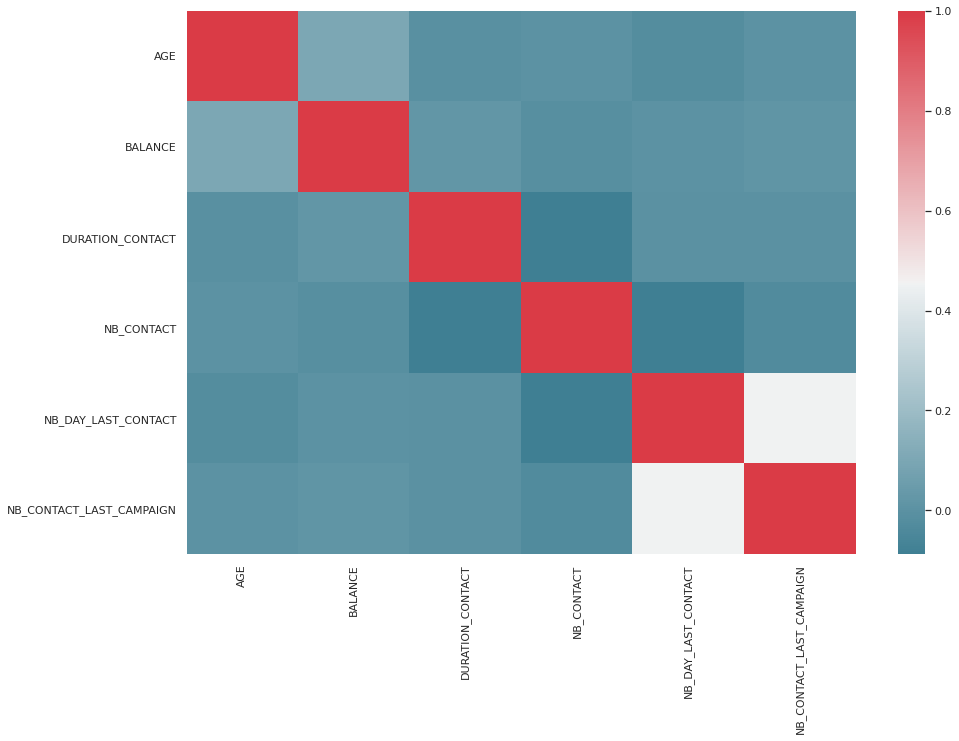

In [4]:
corr = market_campaign.corr()
sns.heatmap(corr, 
    cmap = sns.diverging_palette(220, 10,
    as_cmap=True))

In [14]:
market_campaign_merged.describe()

,AGE,BALANCE,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
count,43330.000000,45136.000000,45136.000000,45136.00000,45136.000000,45136.000000,41084.000000,41084.000000,41084.000000
mean,40.922225,1362.182847,258.050625,2.76573,40.042272,0.575173,0.088726,93.576483,-40.445760
std,10.603480,3046.691765,257.527875,3.10002,99.910200,2.296948,1.566447,0.576712,4.605533
min,18.000000,-8019.000000,0.000000,1.00000,-1.000000,0.000000,-3.400000,92.201000,-50.000000
25%,33.000000,72.000000,103.000000,1.00000,-1.000000,0.000000,-1.800000,93.075000,-42.700000
50%,39.000000,447.500000,180.000000,2.00000,-1.000000,0.000000,1.100000,93.749000,-41.800000
75%,48.000000,1425.000000,318.000000,3.00000,-1.000000,0.000000,1.400000,93.994000,-36.400000
max,95.000000,102127.000000,4918.000000,63.00000,854.000000,275.000000,1.400000,94.601000,-26.900000


In [20]:
market_campaign.isna().sum()

DATE                            0
AGE                          1806
JOB_TYPE                      286
STATUS                       1128
EDUCATION                    1853
HAS_DEFAULT                     0
BALANCE                         0
HAS_HOUSING_LOAN                0
HAS_PERSO_LOAN               1354
CONTACT                     13019
DURATION_CONTACT                0
NB_CONTACT                      0
NB_DAY_LAST_CONTACT             0
NB_CONTACT_LAST_CAMPAIGN        0
RESULT_LAST_CAMPAIGN        36939
SUBSCRIPTION                    0
YEARS                           0
MONTHS                          0
dtype: int64

Nous remarquons que le dataset est globalement bien rempli mais que 2 variables sortent du lot. Pour des raisons de biais nous supprimerons ces 2 variables

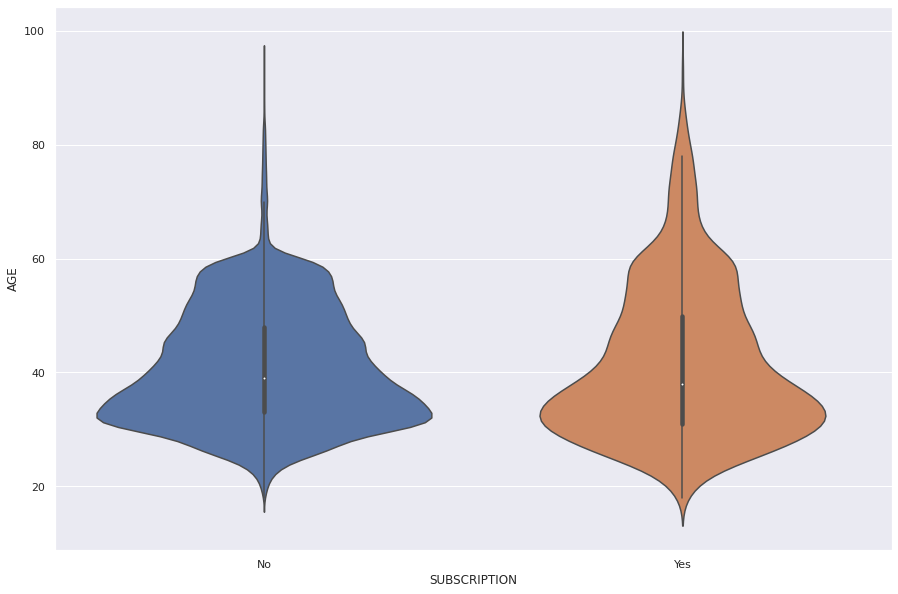

In [12]:
sns.violinplot(x="SUBSCRIPTION",y="AGE", data=market_campaign_merged, whis =2.0);
plt.show()

Étude de la feature STATUS (statut marital)
----
Moyenne de Balance par différent statut

<AxesSubplot:xlabel='STATUS', ylabel='BALANCE'>

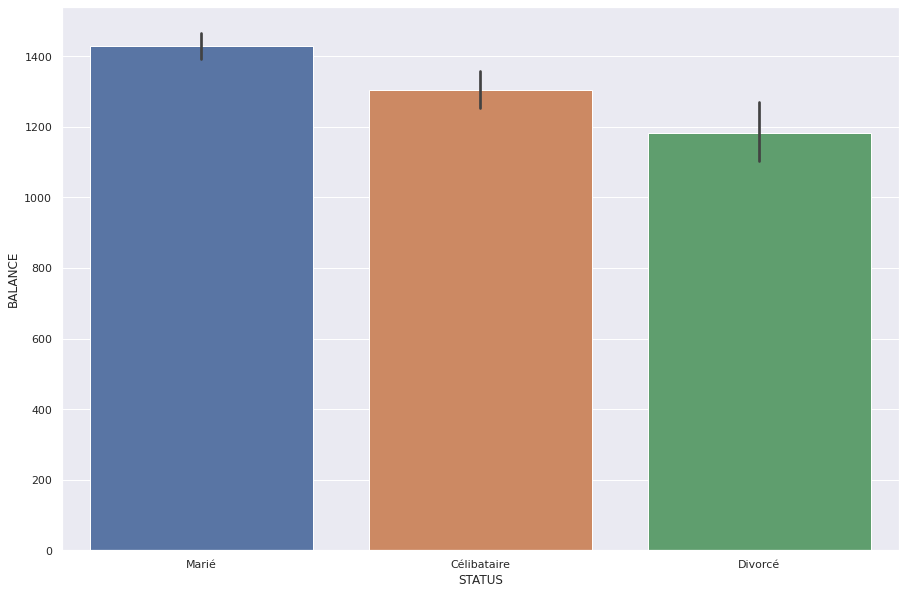

In [13]:
sub_status = market_campaign_merged.dropna(subset = ['STATUS'])

sns.barplot(x = 'STATUS', y = 'BALANCE', data = sub_status)

On remarque aussi que parmi les gens qui ont souscrit, en moyenne la balance est plus haute 

<ipython-input-6-7a099403a05d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subYes = sub_status[market_campaign['SUBSCRIPTION'] =='Yes']
<ipython-input-6-7a099403a05d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subNo = sub_status[market_campaign['SUBSCRIPTION'] =='No']


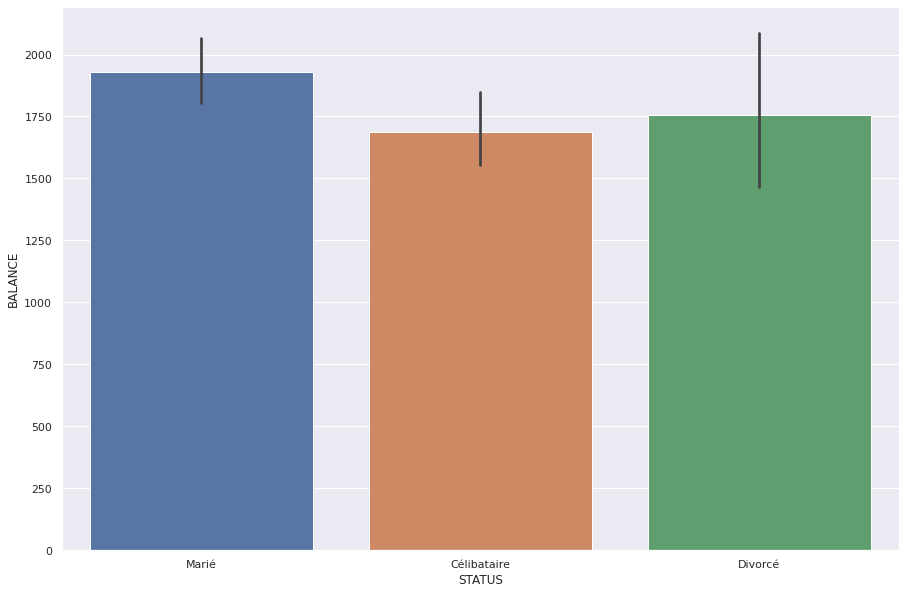

In [6]:
subYes = sub_status[market_campaign_merged['SUBSCRIPTION'] =='Yes']

sns.barplot(x = 'STATUS', y = 'BALANCE', data = subYes)
plt.show()

Étude de la feature JOB_TYPE
----
On va s'intéresser maintenant à la variable JOB_TYPE

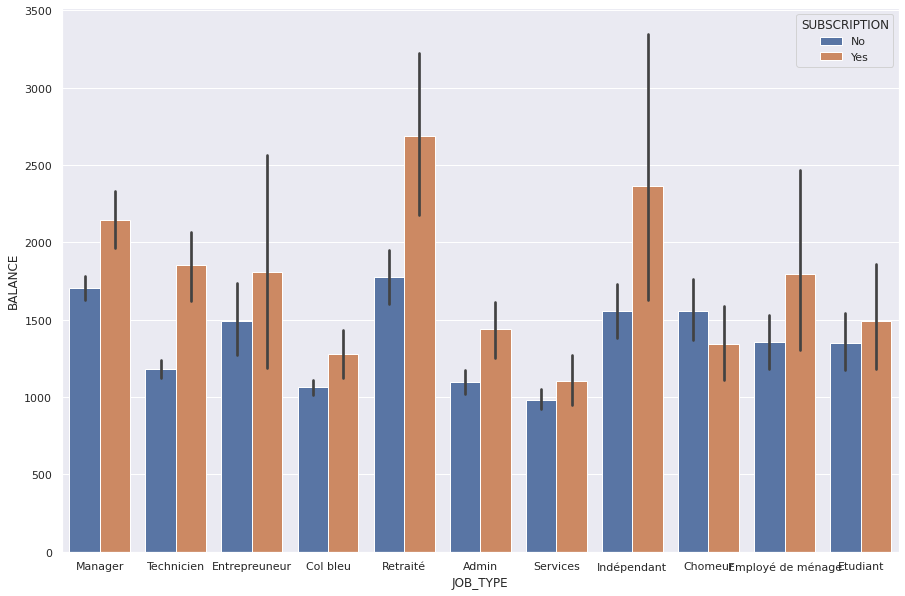

In [57]:
sns.barplot(x = 'JOB_TYPE', y = 'BALANCE', hue = 'SUBSCRIPTION', data = market_campaign.dropna(subset = ['JOB_TYPE']))
plt.show()

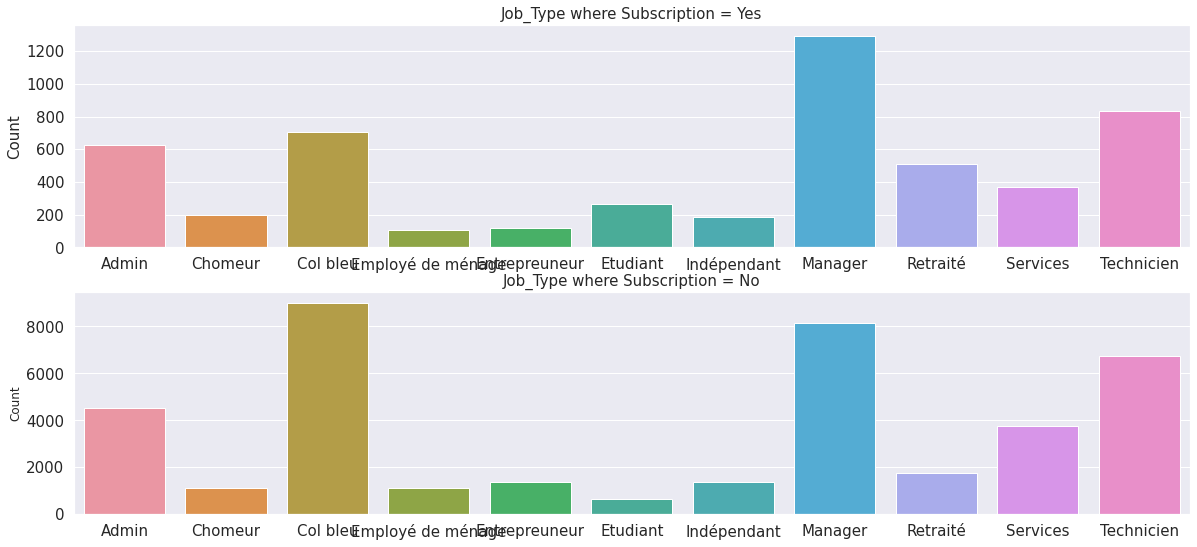

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20,9))

sns.countplot(x = 'JOB_TYPE', data = market_campaign_merged[market_campaign_merged.SUBSCRIPTION == 'Yes'], ax = ax1, 
              order = ["Admin","Chomeur","Col bleu", "Employé de ménage", "Entrepreuneur","Etudiant","Indépendant",
                      "Manager","Retraité","Services","Technicien"])
ax1.set_title('Job_Type where Subscription = Yes', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'JOB_TYPE', data = market_campaign_merged[market_campaign_merged.SUBSCRIPTION == 'No'], ax = ax2,
             order = ["Admin","Chomeur","Col bleu", "Employé de ménage", "Entrepreuneur","Etudiant","Indépendant",
                      "Manager","Retraité","Services","Technicien"])
ax2.set_title('Job_Type where Subscription = No', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count')
ax2.tick_params(labelsize=15)

Étude de la feature Months
----
On va s'intéresser maintenant à la variable MONTHS

/home/dancoh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


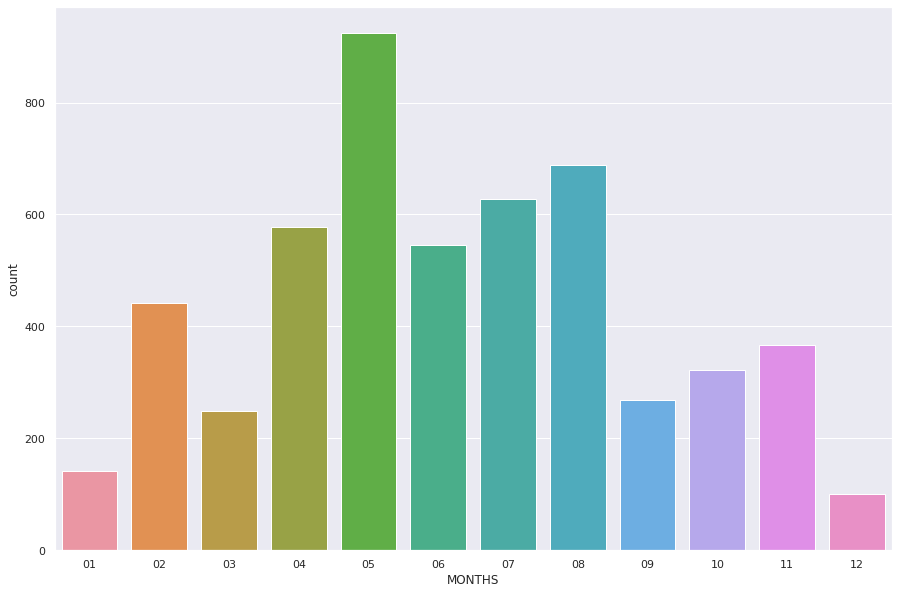

In [54]:
sns.countplot(market_campaign_merged[market_campaign_merged.SUBSCRIPTION == 'Yes'].MONTHS,
              order = ["01","02","03","04","05","06","07","08","09","10","11","12"])
plt.show()

On remarque ici que le taux de souscription est plus élevé de mai à août, mais faible d'octobre à janvier, dû à la période de fin d'année qui est une période de stress économique (impôts, taxes ...) et de fêtes.

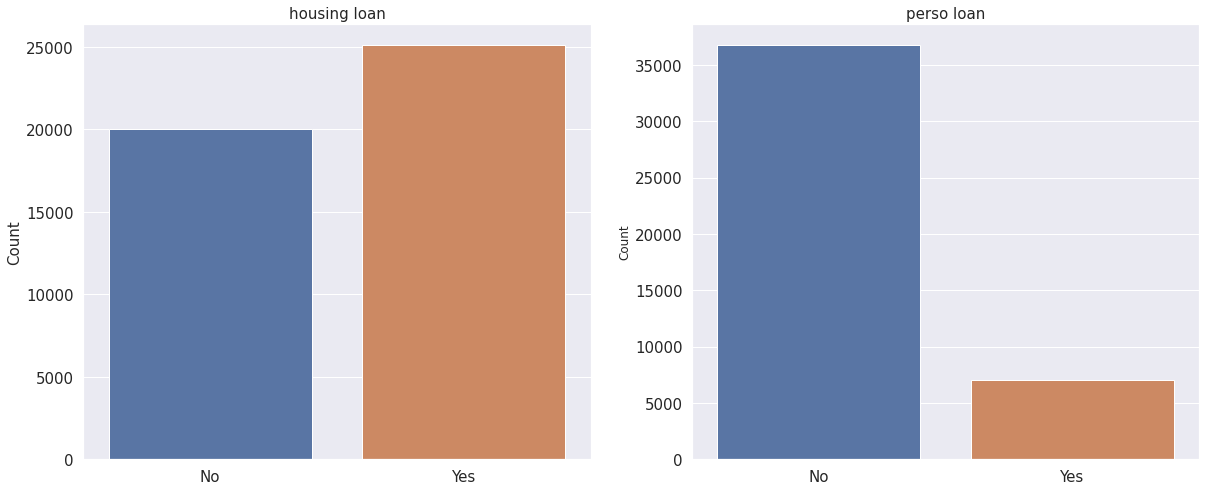

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.countplot(x = 'HAS_HOUSING_LOAN', data = market_campaign_merged, ax = ax1, order = ['No', 'Yes'])
ax1.set_title('housing loan', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'HAS_PERSO_LOAN', data = market_campaign_merged, ax = ax2, order = ['No','Yes'])
ax2.set_title('perso loan', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count')
ax2.tick_params(labelsize=15)

<AxesSubplot:xlabel='EDUCATION', ylabel='BALANCE'>

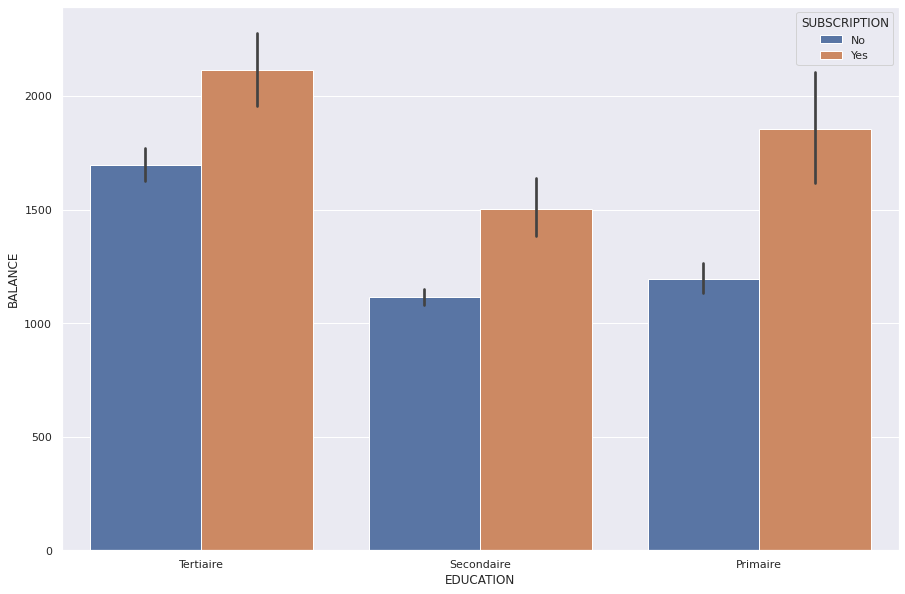

In [58]:
sns.barplot(x = 'EDUCATION', y = 'BALANCE', hue = 'SUBSCRIPTION', data = market_campaign_merged)